# OpenStreetMap

In [1]:
from IPython.display import YouTubeVideo

## 📖 Ahead of time...

This session is all about OpenStreetMap. To provide an overview of what the project is, whether you have never heard of it or you are somewhat familiar, the followring will set your mind "on course":

- The following short clip provides a general overview of what OpenStreetMap is

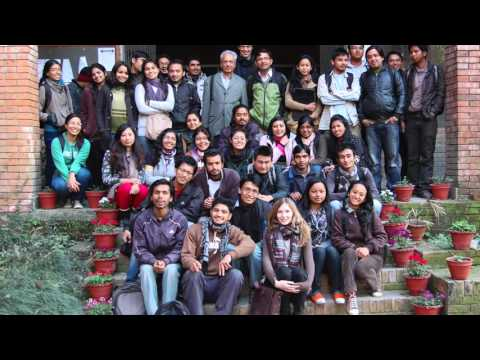

In [2]:
YouTubeVideo(
    "Phwrgb16oEM", width=700, height=300
)

- [This recent piece](https://joemorrison.medium.com/openstreetmap-is-having-a-moment-dcc7eef1bb01) contains several interesting points about how OpenStreetMap is currently being created and some of the implications this model may have.
- Anderson et al. (2019) {cite}`anderson2019corporate` provides some of the academic underpinnings to the views expressed in Morrison's piece

## 💻 Hands-on coding

In [3]:
import geopandas
import contextily
from IPython.display import GeoJSON

Since some of the query options we will discuss involve pre-defined extents, we will read the Madrid neighbourhoods dataset first:


````{tabbed} Local files

Assuming you have the file locally on the path `../data/`: 

```python
neis = geopandas.read_file("../data/neighbourhoods.geojson")
```
````

````{tabbed} Online read

If you're online, you can do:

```python
neis = geopandas.read_file(
    "http://darribas.org/gds4ae/_downloads/44b4bc22c042386c2c0f8dc6685ef17c/neighbourhoods.geojson"
)
```
````


In [4]:
neis = geopandas.read_file("../data/neighbourhoods.geojson")

To make some of the examples below *easy* on OpenStreetMap servers, we will single out the smallest neighborhood:

In [5]:
areas = neis.to_crs(
    epsg=32630
).area

smallest = neis[areas == areas.min()]
smallest

,neighbourhood,neighbourhood_group,geometry
98,Atalaya,Ciudad Lineal,"MULTIPOLYGON (((-3.66195 40.46338, -3.66364 40..."


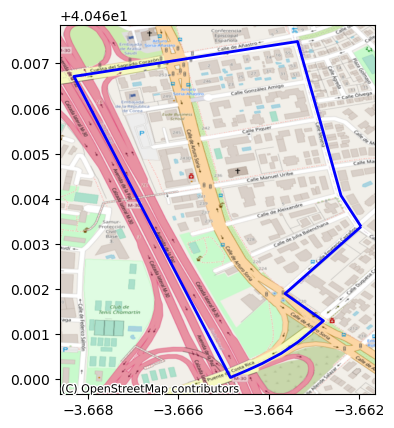

In [6]:
ax = smallest.plot(
    facecolor="none", edgecolor="blue", linewidth=2
)
contextily.add_basemap(
    ax, 
    crs=smallest.crs, 
    source=contextily.providers.OpenStreetMap.Mapnik
);

### `osmnx`

In [7]:
import osmnx as ox

```{margin}
Here is a trick to pin all your queries to OpenStreetMap to a specific date, so results are always reproducible, even if the map changes in the meantime.

Tip courtesy of [Martin Fleischmann](https://martinfleischmann.net/).
```

In [8]:
ox.settings.overpass_settings = (
    '[out:json][timeout:90][date:"2021-03-07T00:00:00Z"]'
)

```{tip}
Much of the methods covered here rely on the `osmnx.features` module. Check out its reference [here](https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.features)
```

There are two broad areas to keep in mind when querying data on OpenStreetMap through `osmnx`:

- The interface to specify the *extent* of the search

- The *nature* of the entities being queried. Here, the interface relies entirely on OpenStreetMap's tagging system. Given the distributed nature of the project, this is variable, but a good place to start is:

> [https://wiki.openstreetmap.org/wiki/Tags](https://wiki.openstreetmap.org/wiki/Tags)



Generally, the interface we will follow involves the following:

```python
received_entities = ox.features_from_XXX(
    <extent>, tags={<key>: True/<value(s)>}, ...
)
```

The `<extent>` can take several forms:

In [9]:
[i for i in dir(ox) if "features_from_" in i]

['features_from_address',
 'features_from_bbox',
 'features_from_place',
 'features_from_point',
 'features_from_polygon',
 'features_from_xml']

The `tags` follow the [official feature spec](https://wiki.openstreetmap.org/wiki/Map_features).

### Buildings

In [10]:
blgs = ox.features_from_polygon(
    smallest.squeeze().geometry, tags={"building": True}
)

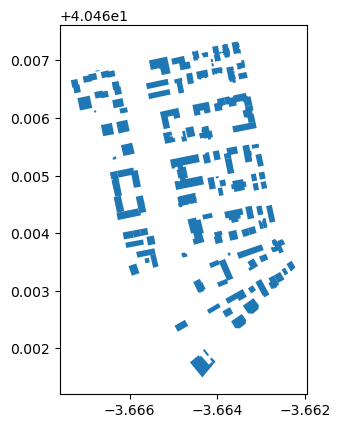

In [11]:
blgs.plot();

In [12]:
blgs.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 115 entries, ('way', 442595762) to ('way', 577690922)
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   name              2 non-null      object  
 1   amenity           2 non-null      object  
 2   geometry          115 non-null    geometry
 3   nodes             115 non-null    object  
 4   building          115 non-null    object  
 5   addr:housenumber  21 non-null     object  
 6   addr:postcode     3 non-null      object  
 7   addr:street       9 non-null      object  
 8   denomination      1 non-null      object  
 9   phone             2 non-null      object  
 10  religion          1 non-null      object  
 11  source            1 non-null      object  
 12  source:date       1 non-null      object  
 13  url               1 non-null      object  
 14  wheelchair        1 non-null      object  
 15  building:levels   11 non-null     

In [13]:
blgs.head()

name amenity  \
element_type osmid                    
way          442595762  NaN     NaN   
             442595763  NaN     NaN   
             442595764  NaN     NaN   
             442595765  NaN     NaN   
             442596830  NaN     NaN   

                                                                 geometry  \
element_type osmid                                                          
way          442595762  POLYGON ((-3.66377 40.46317, -3.66363 40.46322...   
             442595763  POLYGON ((-3.66394 40.46346, -3.66415 40.46339...   
             442595764  POLYGON ((-3.66379 40.46321, -3.66401 40.46314...   
             442595765  POLYGON ((-3.66351 40.46356, -3.66294 40.46371...   
             442596830  POLYGON ((-3.66293 40.46289, -3.66281 40.46294...   

                                                                    nodes  \
element_type osmid                                                          
way          442595762  [4402722774, 4402722775, 4402722776, 440272277...   
             442595763  [4402722778, 4402722779, 4402722780, 440272278...   
             442595764  [4402722782, 4402722783, 4402722784, 440272278...   
             442595765  [4402722786, 4402722787, 4402722788, 440272278...   
             442596830  [4402729658, 4402729659, 4402729660, 440272966...   

                       building addr:housenumber addr:postcode addr:street  \
element_type osmid                                                           
way          442595762      yes              NaN           NaN         NaN   
             442595763      yes              NaN           NaN         NaN   
             442595764      yes              NaN           NaN         NaN   
             442595765      yes              NaN           NaN         NaN   
             442596830      yes              NaN           NaN         NaN   

                       denomination phone  ... addr:country wikidata website  \
element_type osmid                         ...                                 
way          442595762          NaN   NaN  ...          NaN      NaN     NaN   
             442595763          NaN   NaN  ...          NaN      NaN     NaN   
             442595764          NaN   NaN  ...          NaN      NaN     NaN   
             442595765          NaN   NaN  ...          NaN      NaN     NaN   
             442596830          NaN   NaN  ...          NaN      NaN     NaN   

                       country diplomatic name:en name:fr name:ko office  \
element_type osmid                                                         
way          442595762     NaN        NaN     NaN     NaN     NaN    NaN   
             442595763     NaN        NaN     NaN     NaN     NaN    NaN   
             442595764     NaN        NaN     NaN     NaN     NaN    NaN   
             442595765     NaN        NaN     NaN     NaN     NaN    NaN   
             442596830     NaN        NaN     NaN     NaN     NaN    NaN   

                       target  
element_type osmid             
way          442595762    NaN  
             442595763    NaN  
             442595764    NaN  
             442595765    NaN  
             442596830    NaN  

[5 rows x 27 columns]

If you want to visit the entity online, you can do so at:

> `https://www.openstreetmap.org/<unique_id>`

```{admonition} Challenge
Extract the building footprints for the Sol neighbourhood in `neis`
```

### Other polygons

In [14]:
park = ox.features_from_place(
    "Parque El Retiro, Madrid", tags={"leisure": "park"}
)

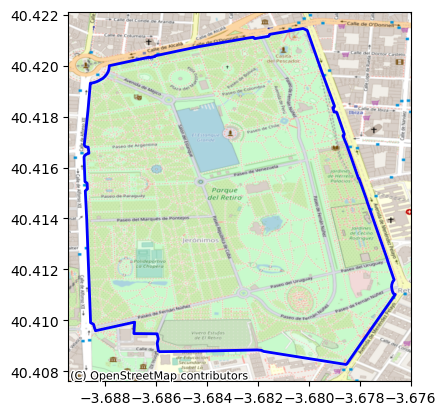

In [15]:
ax = park.plot(
    facecolor="none", edgecolor="blue", linewidth=2
)
contextily.add_basemap(
    ax, 
    crs=smallest.crs, 
    source=contextily.providers.OpenStreetMap.Mapnik
);

### Points of interest

Bars around Atocha station:

In [16]:
bars = ox.features_from_address(
    "Puerta de Atocha, Madrid", tags={"amenity": "bar"}, dist=1500
)

We can quickly explore with `GeoJSON`:

````{margin} Data
If you have an earlier version of `geopandas` than 0.10, you can obtain a similar map with:

```%python
GeoJSON(bars.__geo_interface__)
```
````

In [17]:
bars.explore()

And stores within Malasaña:

In [18]:
shops = ox.features_from_address(
    "Malasaña, Madrid, Spain", # Boundary to search within
    tags={
        "shop": True,
        "landuse": ["retail", "commercial"],
        "building": "retail"
    },
    dist=1000
)

We use `features_from_place` for delineated areas ("polygonal entities"):

In [19]:
cs = ox.features_from_place(
    "Madrid, Spain",
    tags={"amenity": "charging_station"}
)
cs.explore()

Similarly, we can work with location data. For example, searches around a given point:

In [20]:
bakeries = ox.features_from_point(
    (40.418881103417675, -3.6920446157455444),
    tags={"shop": "bakery", "craft": "bakery"},
    dist=500
)
GeoJSON(bakeries.__geo_interface__)

<IPython.display.GeoJSON object>

```{admonition} Challenge
- *How many music shops does OSM record within 750 metres of Puerta de Alcalá?*
- *Are there more restaurants or clothing shops within the polygon that represents the Pacífico neighbourhood in `neis` table?*
```

### Streets

Street data can be obtained as another type of entity, as above; or as a graph object.

#### Geo-tables

In [21]:
centro = ox.features_from_polygon(
    neis.query("neighbourhood == 'Sol'").squeeze().geometry,
    tags={"highway": True}
)

We can get a quick peak into what is returned (grey), compared to the region we used for the query:

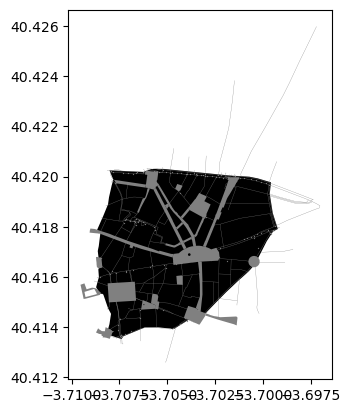

In [22]:
ax = neis.query(
    "neighbourhood == 'Sol'"
).plot(color="k")
centro.plot(
    ax=ax, 
    color="0.5", 
    linewidth=0.2, 
    markersize=0.5
);

This however will return all sorts of things:

In [23]:
centro.geometry

element_type  osmid    
node          21734214                             POINT (-3.70427 40.41662)
              21734250                             POINT (-3.70802 40.41612)
              21734252                             POINT (-3.70847 40.41677)
              21968134                             POINT (-3.69945 40.41786)
              21968197                             POINT (-3.70054 40.41645)
                                                 ...                        
way           907553665    LINESTRING (-3.70686 40.41380, -3.70719 40.41369)
              909056211    LINESTRING (-3.70705 40.42021, -3.70680 40.42020)
relation      5662178      POLYGON ((-3.70948 40.41551, -3.70952 40.41563...
              7424032      POLYGON ((-3.70263 40.41712, -3.70253 40.41714...
              8765884      POLYGON ((-3.70636 40.41475, -3.70635 40.41481...
Name: geometry, Length: 609, dtype: geometry

#### Spatial graphs

This returns clean, processed *graph* objects for the street network:

In [24]:
[i for i in dir(ox) if "graph_from_" in i]

['graph_from_address',
 'graph_from_bbox',
 'graph_from_gdfs',
 'graph_from_place',
 'graph_from_point',
 'graph_from_polygon',
 'graph_from_xml']

In [25]:
centro_gr = ox.graph_from_polygon(
    neis.query("neighbourhood == 'Sol'").squeeze().geometry,
)

In [26]:
centro_gr

And to visualise it:

In [27]:
[i for i in dir(ox) if "plot_graph" in i]

['plot_graph', 'plot_graph_folium', 'plot_graph_route', 'plot_graph_routes']

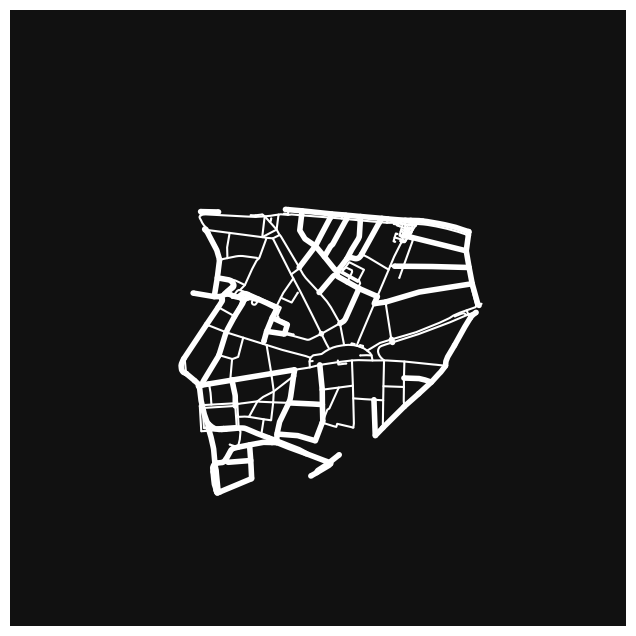

In [28]:
ox.plot_figure_ground(centro_gr);

In [29]:
(
    ox.graph_to_gdfs(centro_gr, nodes=False)
    .explore()
)

```{admonition} Challenge
*How many bookshops are within a 50m radious of the Paseo de la Castellana?*

Bonus tip: this one involves the following steps:

- Extracting the street segment for Paseo de la Castellana
- Drawing a 50m buffer around it
- Querying OSM for bookshops
```

## 🐾 Next steps

If you found the content in this block useful, the following resources represent some suggestions on where to go next:

- Parts of the block are inspired and informed by Geoff Boeing's excellent [course on Urban Data Science](https://github.com/gboeing/ppd599)
- More in depth content about `osmnx` is available in the [official examples collection](https://github.com/gboeing/osmnx-examples)
- Boeing (2020) {cite}`boeing2020exploring` illustrates how OpenStreetMap can be used to analyse urban form ([Open Access](https://osf.io/preprints/socarxiv/rnwgv/))